### Model Training
#### 1 Import required packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [4]:
df = pd.read_csv(r'C:\Users\ylank\OneDrive\Documents\D.S Projects\AirlineRoutesAndPricing\notebook\eda_data.csv')

In [5]:
df.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,8,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,4,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


#### 2. Build machine learning model
- State X and y variable
- Random Forest
- Create ML pipeline
- Decision Tree using pipeline

##### 2.1 X and y variable

In [6]:
X = df.drop(['Price'],axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.2 Random Forest

In [7]:
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)

y_pred = ml_model.predict(X_test)
y_pred

array([16806.19      ,  5505.19      ,  8807.15      , ...,
        6483.08      , 13059.893     , 13109.95233333])

In [8]:
metrics.r2_score(y_test,y_pred)

0.8137236861149557

#### 2.3 Create ML pipeline

In [11]:
def mape(y_true, y_pred):
    y_true , y_pred = np.array(y_true), np.array(y_pred)
    np.mean(np.abs((y_true - y_pred) /y_true))*100

mape(y_test, y_pred)

In [12]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predicitions are: {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE: {}'.format(mape(y_test, y_prediction)))

    sns.distplot(y_test - y_prediction)

Training Score: 0.9651196669167478
Predicitions are: [16840.  4959.  9397. ...  6152. 13339. 14335.]


r2_score: 0.6991857950259002
MAE: 1380.3076821088753
MSE: 6056982.223483725
RMSE: 2461.093704734488
MAPE: None


C:\Users\ylank\AppData\Local\Temp\ipykernel_29580\3050525023.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_prediction)


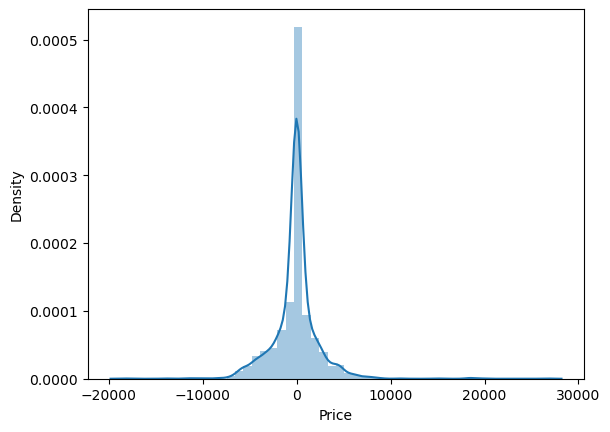

In [13]:
predict(DecisionTreeRegressor())

Training Score: 0.9504979715305035
Predicitions are: [16803.67        5448.3         8824.15       ...  6580.76
 12717.407      13235.68483333]


r2_score: 0.8115148912989203
MAE: 1196.2084954599813
MSE: 3795202.9322954793
RMSE: 1948.1280584949952
MAPE: None


C:\Users\ylank\AppData\Local\Temp\ipykernel_29580\3050525023.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_prediction)


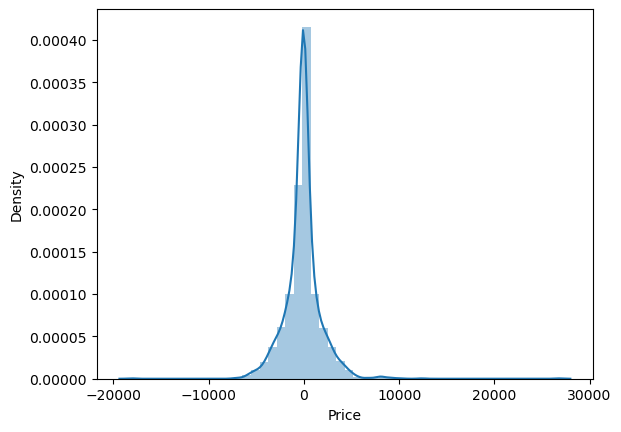

In [15]:
predict(RandomForestRegressor())

### 3. Hypertune Random Forest

In [16]:
reg_rf = RandomForestRegressor()

In [17]:
np.linspace(start = 100, stop = 1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num=4)]
min_samples_split = [5,10,15,100]

In [19]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [20]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [21]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\ylank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ylank\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ylank\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ylank\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ylank\anaconda3\Lib\site-packages\s

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [22]:
rf_random.best_estimator_


RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=5)

In [23]:
rf_random.best_score_

0.8048204899578956